<a href="https://colab.research.google.com/github/Tien84/Face-Detection/blob/master/demoARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install matplotlib

In [ ]:
!pip install statsmodels

In [ ]:
!pip install numpy

In [ ]:
!pip install scipy

In [ ]:
!pip install pandas

In [ ]:
!pip install sklearn

In [ ]:
!pip install yfinance

In [ ]:
!pip install pmdarima

In [ ]:
from google.colab import drive
drive.mount('/content/driver')

In [12]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import math
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [13]:
df=pd.read_csv('/content/driver/My Drive/LSTM_Model/AAPL.csv')
df=df.dropna()
print('Shape of data',df.shape)
df.head()
df

Shape of data (2018, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,58.500000,58.928570,58.428570,58.747143,56.011238,75564699
1,2012-01-04,58.599998,59.240002,58.468571,59.062859,56.312252,65061108
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,56.937424,67816805
3,2012-01-06,59.967140,60.392857,59.888573,60.342857,57.532646,79596412
4,2012-01-09,60.788570,61.107143,60.192856,60.247143,57.441391,98505792
...,...,...,...,...,...,...,...
2013,2020-01-03,297.149994,300.579987,296.500000,297.429993,293.598297,36633878
2014,2020-01-06,293.790009,299.959991,292.750000,299.799988,295.937744,29644644
2015,2020-01-07,299.839996,300.899994,297.480011,298.390015,294.545959,26207813
2016,2020-01-08,297.160004,304.439911,297.156006,303.190002,299.284088,33090946


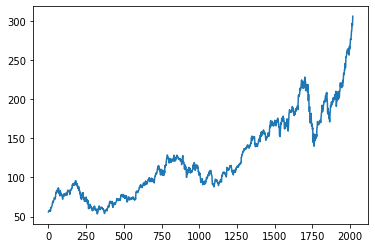

In [14]:
plt.plot(df.index, df['Adj Close'])
plt.show()

In [15]:
#Train test split
to_row = int(len(df)*0.9)     # Result: 1816
print (to_row)


1816


In [16]:
training_data = list(df[0:to_row]['Adj Close'])
testing_data = list(df[to_row:]['Adj Close'])
#testing_data = (df[to_row:]['Adj Close'])
testing_data

[185.81454499999998,
 183.894745,
 185.548721,
 185.794861,
 187.005798,
 188.275818,
 191.012741,
 192.32208300000002,
 192.65683,
 193.946518,
 196.99848899999998,
 196.407776,
 197.51040600000002,
 195.866333,
 195.787521,
 196.141922,
 196.161621,
 199.981491,
 200.70018000000002,
 201.359818,
 204.264084,
 203.949036,
 202.09816,
 201.133392,
 201.438553,
 197.559616,
 207.25698899999998,
 205.90820300000001,
 208.467896,
 205.24856599999998,
 199.715698,
 199.755066,
 197.608871,
 194.31008899999998,
 183.016876,
 185.914078,
 188.141205,
 187.313431,
 186.249115,
 180.425125,
 183.884094,
 180.119659,
 177.045074,
 176.365112,
 175.63588000000001,
 174.798248,
 175.704849,
 172.521866,
 170.777618,
 177.02539099999998,
 179.883148,
 182.524155,
 187.382385,
 189.77702299999999,
 191.974564,
 191.36360200000001,
 191.324173,
 189.93469199999998,
 191.067963,
 195.561584,
 194.990036,
 196.556915,
 195.88678000000002,
 195.689697,
 192.723526,
 196.891953,
 196.832809,
 195.039307

In [17]:
print (len(training_data))
print(len(testing_data))

1816
202


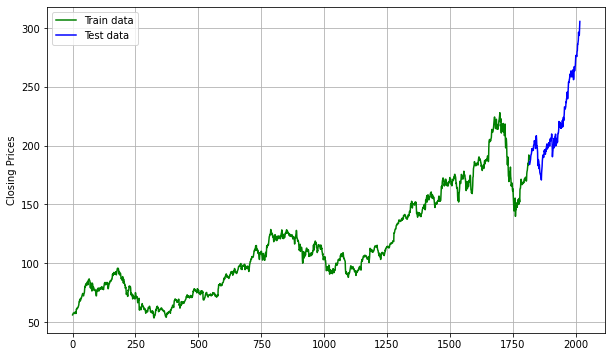

In [18]:
plt.figure(figsize=(10,6))
plt.grid(True)
#plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df[0:to_row]['Adj Close'],'green',label='Train data')
plt.plot(df[to_row:]['Adj Close'],'blue',label= 'Test data')
plt.legend()

In [26]:
model_predict = []
n_test_ob = len(testing_data)   #202
n_test_ob

202

In [ ]:
from pmdarima.arima import auto_arima
stepwise_model =  auto_arima(training_data,start_p=0, d=1, start_q=0, 
                          max_p=5, max_d=5, max_q=5, start_P=0, 
                          D=1, start_Q=0, max_P=5, max_D=5,
                          max_Q=5, m=12, seasonal=True, 
                          error_action='warn',trace = True,
                          supress_warnings=True,stepwise = True,
                          random_state=20,n_fits = 50 )
print(stepwise_model.aic())


In [29]:
for i in range(n_test_ob):
  model = ARIMA(training_data, order= (4,1,1))
  model_fit = model.fit()
  output = model_fit.forecast()
  yhat = list(output[0])[0]
  model_predict.append(yhat)
  actual_test_value = testing_data[i]
  training_data.append(actual_test_value)

NotImplementedError: ignored

In [ ]:
model_fit.summary()

In [23]:
len(model_predict)

0

In [ ]:
len(testing_data)

202

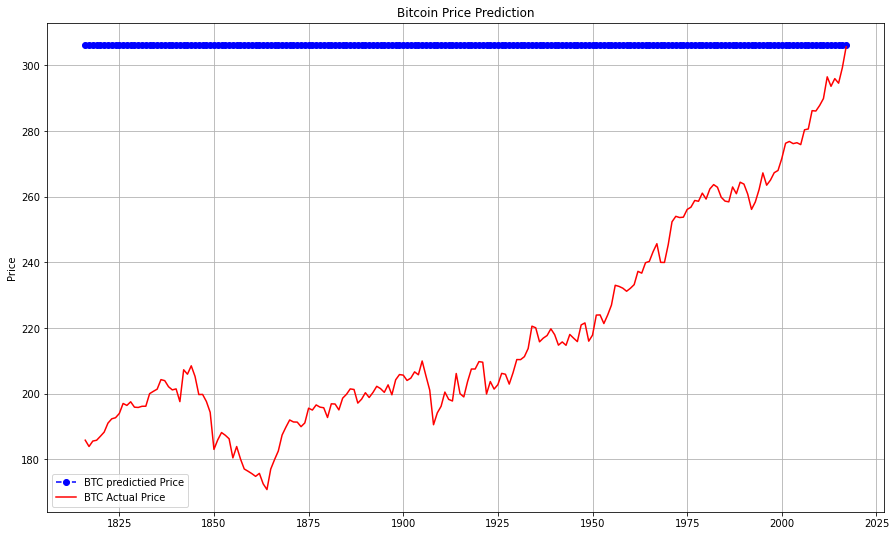

In [ ]:
plt.figure(figsize=(15,9))
plt.grid(True)

date_range = df[to_row:].index

plt.plot(date_range , model_predict[:202], color = 'blue', marker = 'o', linestyle ='dashed', label = 'BTC predictied Price')
plt.plot(date_range,testing_data, color = 'red', label = 'BTC Actual Price')

plt.title('Bitcoin Price Prediction')
#plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [ ]:
#report performance
mape = np.mean(np.abs(np.array(model_predict) - np.array(testing_data))/np.abs(testing_data))
print('MAPE: ' + str(mape))

MAPE: 0.4243958734430338


In [ ]:
from math import sqrt
mse = mean_squared_error(testing_data, model_predict)
rmse = math.sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 92.671217
